# Meningkatkan Kemungkinan Lagu Baru dari Sebuah Artis Menjadi Populer dan Trending Berdasarkan Spotify Dataset Menggunakan Model Supervised Learning


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x':np.arange(1,101),'y':np.random.normal(0,4,100)})

##**Business Understanding**

### Business Objective

Tujuan utama analisis pada dataset ini adalah meningkatkan popularitas dan potensi lagu-lagu baru yang akan dirilis oleh musisi. Analisis dilakukan dengan merujuk pada popularitas lagu-lagu yang telah ada di platform Spotify, dengan mempertimbangkan berbagai faktor penilaian yang telah ditentukan untuk setiap lagu. Dengan memahami karakteristik dan tren dari lagu-lagu yang sukses dan populer, kita dapat mengembangkan strategi yang lebih terarah untuk mengoptimalkan potensi keberhasilan lagu-lagu baru di pasar musik yang kompetitif.

### Assess Situation

Analisis ini didasari oleh dorongan untuk memperluas popularitas seorang artis musik melalui penilaian mendalam terhadap lagu-lagu yang akan dirilis. Pendekatan ini didasarkan pada kebutuhan mendalam untuk memahami selera dan harapan pendengar, dengan harapan dapat menciptakan karya yang tidak hanya memenuhi ekspektasi pendengar, tetapi juga meraih daya tarik luas. Dengan menganalisis kebutuhan pendengar secara cermat, kita dapat merancang strategi yang lebih terfokus untuk meningkatkan daya tarik setiap rilisan musik yang akan datang.

### Data Mining Goals

Tujuan dari analisis data ini adalah untuk menentukan pola-pola dari setiap lagu berdasarkan faktor-faktor yang mempengaruhi sebuah lagu yang populer dan trending di platform Spotify seperti durasi, tempo, dan lain-lain. Selanjutnya, rancangan kesuksesan lagu akan dibangun, memberikan pandangan yang dapat membantu dalam mengidentifikasi kesuksesan yang mungkin dapat diadaptasi sebagai strategi pembuatan dan pemasaran lagu-lagu baru di platform Spotify. Dengan demikian, analisis data ini diharapkan dapat memberikan wawasan yang mendalam dan bermanfaat untuk mendukung pengambilan keputusan terkait strategi musik khususnya di platform Spotify.

### Project Plan

Proyek ini diawali dengan tahap pengumpulan data dari sumber yang tersedia, yang melibatkan penggalian dataset yang relevan. Setelah itu, karakteristik dataset akan dijelaskan dengan mengidentifikasi variabel kunci terkait karakteristik lagu dan popularitas. Selanjutnya, kita akan melihat data lebih detail untuk mengidentifikasi pola-pola dan tren yang ada. Setelah itu, fokus akan beralih ke tahap preprocessing dan penilaian kualitas data dan analisis lebih lanjut akan dilakukan untuk mengidentifikasi korelasi dan hubungan antara fitur-fitur lagu dan popularitasnya. Pada tahap inti, model prediktif akan dikembangkan untuk memprediksi popularitas lagu, kemudian hasil dari model yang telah diimplementasikan akan digunakan untuk merumuskan rekomendasi dan mengembangkan strategi yang dapat meningkatkan popularitas lagu.

##**Data Understanding**

### Collect Initial Data

Dataset ini diambil dari Kaggle dengan username @MAHARSHIPANDYA. Dataset Spotify ini menyajikan kumpulan lagu dari berbagai genre musik sebanyak 125 jenis yang berbeda, memberikan pemandangan musik yang kaya dan beragam untuk dianalisis. Setiap data dalam dataset ini merepresentasikan satu lagu dan dilengkapi dengan serangkaian fitur audio yang mencakup berbagai aspek musik. Informasi tentang dataset ini dapat diakses pada link berikut: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

In [3]:
df_file = pd.read_csv("dataset.csv")
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


### Describe Data

#### Informasi Dasar

In [4]:
jumlah_baris, jumlah_kolom = df_file.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 41791
Jumlah Kolom: 21


Dataset ini memiliki jumlah baris sebanyak 114000 yang berarti dataset ini menyimpan sebanyak 114000 data dan masing-masing data memiliki 21 kolom.

#### Informasi Lanjutan

In [5]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41791 entries, 0 to 41790
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        41791 non-null  int64  
 1   track_id          41791 non-null  object 
 2   artists           41791 non-null  object 
 3   album_name        41791 non-null  object 
 4   track_name        41791 non-null  object 
 5   popularity        41791 non-null  int64  
 6   duration_ms       41791 non-null  int64  
 7   explicit          41791 non-null  bool   
 8   danceability      41791 non-null  float64
 9   energy            41791 non-null  float64
 10  key               41791 non-null  int64  
 11  loudness          41791 non-null  float64
 12  mode              41791 non-null  int64  
 13  speechiness       41791 non-null  float64
 14  acousticness      41791 non-null  float64
 15  instrumentalness  41791 non-null  float64
 16  liveness          41791 non-null  float6

*Deskripsi Column*
1. track_id : Merupakan ID Spotify untuk tiap track lagu. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
2. artists : Merupakan nama dari artis yang menyanyikan lagu tersebut, jika terdapat lebih dari dua artis yang menyanyikan lagu tersebut maka dipisahkan dengan tanda ";". Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
3. album_name : Merupakan nama album dimana lagu tersebut berada. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
4. track_name : Merupakan nama track/lagu tersebut. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
5. popularity : Merupakan kolom yang menilai  seberapa populer lagu tersebut dari 0 hingga 100, dengan 100 yang berarti lagu tersebut paling populer. Kepopularitasan lagu ini dinilai berdasarkan jumlah berapa kali lagu tersebut diputar dan seberapa kini putaran dari lagu tersebut dilakukan. Popularitas artis dan album diperoleh secara matematis dari popularitas lagu. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
6. duration_ms : Merupakan durasi lagu dalam milisecond. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
7. explicit : Merupakan penilaian apakah lirik dalam lagu tersebut berisi kata kasar atau tidak. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data booelan.
8. danceability : Merupakan penilaian seberapa menarik lagu tersebut untuk digunakan menari. Hal ini dinilai dari beberapa elemen musik seperti tempo, kestabilan ritme, kekuatan irama, dan keteraturan secara keseluruhan. Isi dari nilainya mulai dari 0.0 hingga 1.0. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
9. energy : Merupakan penilaian dari 0.0 hingga 1.0 berdasarkan intensitas dan aktivitas dari lagu tersebut. Biasanya lagu berenergi terasa lebih cepat, keras, dan berisik. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
10. key : Merupakan kunci dari lagu tersebut. Angka-angka ini menggambarkan nada menggunakan notasi Pitch Class standar. Contohnya, 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya. Jika tidak ada kunci yang terdeteksi, nilai yang digunakan adalah -1. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
11. loudness : Merupakan kenyaringan lagu secara keseluruhan dalam desibel (dB). Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
12. mode : Merupakan indikasi modalitas (Mayor atau Minor) dari sebuah lagu, jenis skala dari mana konten melodiannya berasal. Mayor direpresentasikan oleh 1 dan Minor oleh 0. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
13. speechiness : Speechiness mendeteksi keberadaan kata-kata yang diucapkan dalam sebuah lagu. Semakin eksklusif rekaman terdengar seperti pidato (misalnya, talk show, audio book, puisi), semakin mendekati nilai atribut 1.0. Nilai di atas 0.66 menggambarkan lagu yang mungkin sepenuhnya terdiri dari kata-kata yang diucapkan. Nilai antara 0.33 dan 0.66 menggambarkan lagu yang mungkin mengandung baik musik maupun ucapan, entah dalam bagian-bagian tertentu atau terlapis, termasuk kasus seperti musik rap. Nilai di bawah 0.33 kemungkinan besar mencerminkan musik dan lagu-lagu lain yang tidak mirip ucapan. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
14. acousticness : Sebuah ukuran kepercayaan dari 0.0 hingga 1.0 mengenai apakah lagu tersebut bersifat akustik. Angka 1.0 mencerminkan tingkat kepercayaan yang tinggi bahwa lagu tersebut bersifat akustik. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
15. instrumentalness : Memprediksi apakah sebuah lagu tidak mengandung vokal. Suara "ooh" dan "aah" dianggap sebagai instrumental dalam konteks ini. Lagu rap atau yang berisi kata-kata yang diucapkan dengan jelas dianggap "vokal". Semakin mendekati nilai instrumentalness 1.0, semakin besar kemungkinan lagu tersebut tidak mengandung konten vokal. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
16. liveness : Mendeteksi kehadiran penonton dalam rekaman. Nilai kehadiran yang tinggi mengindikasikan kemungkinan besar bahwa lagu tersebut dipentaskan secara langsung. Nilai di atas 0,8 memberikan kemungkinan besar bahwa lagu tersebut adalah rekaman live. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
17. valence : Sebuah ukuran dari 0.0 hingga 1.0 yang menggambarkan kepositifan musikal yang disampaikan oleh sebuah lagu. Lagu-lagu dengan valensi tinggi terdengar lebih positif (misalnya, ceria, bahagia, euforia), sementara lagu-lagu dengan valensi rendah terdengar lebih negatif (misalnya, sedih, tertekan, marah). Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
18. tempo : Kecepatan tempo secara keseluruhan dari sebuah lagu diukur dalam ketukan per menit (BPM). Dalam istilah musik, tempo adalah kecepatan atau laju suatu karya musik dan langsung berasal dari durasi rata-rata setiap ketukan. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
19. time_signature : Suatu tanda waktu yang diperkirakan. Tanda waktu (meter) merupakan konvensi notasi untuk menentukan berapa banyak ketukan yang ada dalam setiap bilah (atau ukuran). Tanda waktu bervariasi mulai dari 3 hingga 7, yang menunjukkan tanda waktu seperti 3/4 hingga 7/4. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
20. track_genre : Merupakan genre dari lagu tersebut. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.







#### Informasi Statistik Deskriptif

In [6]:
df_file.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,41791.000000,41791.000000,4.179100e+04,41791.000000,41791.000000,41791.000000,41791.000000,41791.000000,41791.000000,41791.000000,41791.000000,41791.000000,41791.000000,41791.000000,41790.000000
mean,20895.000000,33.362686,2.321330e+05,0.576327,0.640524,5.326721,-8.295916,0.632672,0.095367,0.302711,0.182286,0.207010,0.462767,122.526675,3.915363
std,12064.166887,22.022526,1.222714e+05,0.174290,0.247246,3.564605,5.065944,0.482083,0.140589,0.328225,0.326735,0.185439,0.258645,28.876139,0.402487
min,0.000000,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,10447.500000,17.000000,1.734535e+05,0.464000,0.481000,2.000000,-9.974000,0.000000,0.036000,0.015200,0.000000,0.096400,0.245000,100.552000,4.000000
50%,20895.000000,35.000000,2.132660e+05,0.590000,0.682000,5.000000,-7.014000,1.000000,0.048700,0.155000,0.000102,0.128000,0.446000,122.974000,4.000000
75%,31342.500000,50.000000,2.658330e+05,0.706000,0.845000,8.000000,-5.070500,1.000000,0.084900,0.568000,0.154000,0.259000,0.668000,139.964000,4.000000
max,41790.000000,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.995000,0.995000,0.995000,243.372000,5.000000


1. popularity :
- count = 114000
- mean = 33.238535
- std = 22.305078
- min = 0
- 25% = 17
- 50% = 35
- 75% = 50
- max = 100
2. duration_ms:
- count = 1.140000e+05
- mean = 2.280292e+05
- std = 1.072977e+05
- min = 0
- 25% = 1.740660e+05
- 50% = 2.129060e+05
- 75% = 2.615060e+05
- max = 5.237295e+06
3. danceability:
- count = 114000
- mean = 0.566800
- std = 0.173542
- min = 0
- 25% = 0.456000
- 50% = 0.580000
- 75% = 0.695000
- max = 0.985000
4. energy:
- count = 114000
- mean = 0.641383
- std = 0.251529
- min = 0
- 25% = 0.472000
- 50% = 0.685000
- 75% = 0.854000
- max = 1
5. key:
- count = 114000
- mean = 5.309140
- std = 3.559987
- min = 0
- 25% = 2
- 50% = 5
- 75% = 8
- max = 11
6. loudness:
- count = 114000
- mean = -8.258960
- std = 5.029337
- min = -49.531000
- 25% = -10.013000
- 50% = -7.004000
- 75% = -5.003000
- max = 4.532000
7. mode:
- count = 114000
- mean = 0.637553
- std = 0.480709
- min = 0
- 25% = 0
- 50% = 1
- 75% = 1
- max = 1
8. speechiness:
- count = 114000
- mean = 0.084652
- std = 0.105732
- min = 0
- 25% = 0.035900
- 50% = 0.048900
- 75% = 0.084500
- max = 0.965000
9. acousticness:
- count = 114000
- mean = 0.314910
- std = 0.332523
- min = 0
- 25% = 0.016900
- 50% = 0.169000
- 75% = 0.598000
- max = 0.996000
10. instrumentalness:
- count = 114000
- mean = 0.156050
- std = 0.309555
- min = 0
- 25% = 0
- 50% = 0.000042
- 75% = 0.049000
- max = 1
11. liveness:
- count = 114000
- mean = 0.213553
- std = 0.190378
- min = 0
- 25% = 0.098000
- 50% = 0.132000
- 75% = 0.273000
- max = 1
12. valence:
- count = 114000
- mean = 0.474068
- std = 0.259261
- min = 0
- 25% = 0.260000
- 50% = 0.464000
- 75% = 0.683000
- max = 0.995000
13. tempo:
- count = 114000
- mean = 122.147837
- std = 29.978197
- min = 0
- 25% = 99.218750
- 50% = 122.017000
- 75% = 140.071000
- max = 243.372000
14. time_signature:
- count = 114000
- mean = 3.904035
- std = 0.432621
- min = 0
- 25% = 4
- 50% = 4
- 75% = 4
- max = 5

### Exploratory Data Analysis

<ipython-input-7-e79115483196>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='popularity', y='track_genre', data=df_file, ci=None,


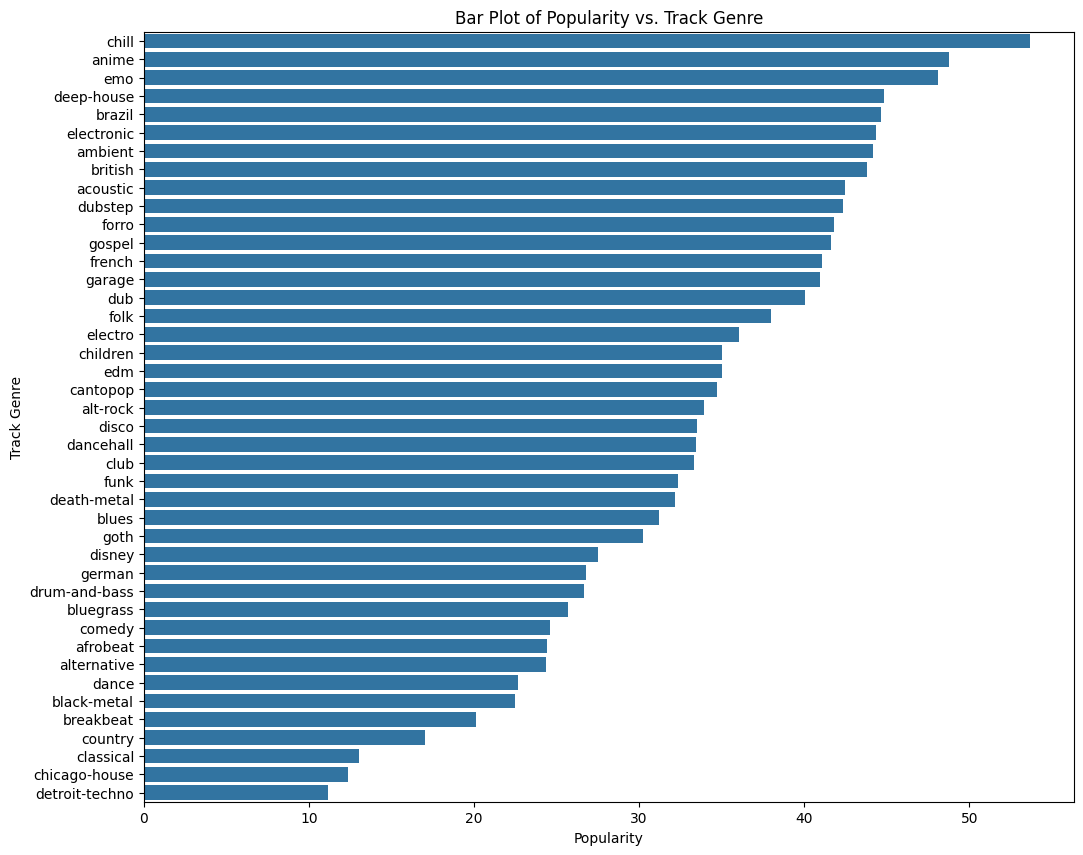

In [7]:
# sampledata = df_file.sample(n=100)

# Create the bar plot without error bars and in descending order
plt.figure(figsize=(12, 10))
sns.barplot(x='popularity', y='track_genre', data=df_file, ci=None,
            order=df_file.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).index)

# Set labels and title
plt.xlabel('Popularity')
plt.ylabel('Track Genre')
plt.title('Bar Plot of Popularity vs. Track Genre')

# Show the plot
plt.show()

Pada plot ini ada empat genre yang memiliki popularitas yang tinggi, yaitu chill, grunge, anime, dan emo. Empat genre ini akan kita gunakan nantinya untuk melihat korelasinya dengan variabel kolom-kolom penilaian yang lain. Kemudian pada plot ini juga dapat kita lihat bahwa genre classical, chicago-house, dan detroit techno memiliki tingkat popularitas yang rendah. Dengan hasil plot ini kita dapat memilih genre mana yang dapat meningkatkan kemungkinan dari popularitas musik nanti dan menghindari genre yang memiliki tingkat popularitas yang rendah.

<ipython-input-8-d663056e82c5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='danceability', data=filtered_data, ci=None)


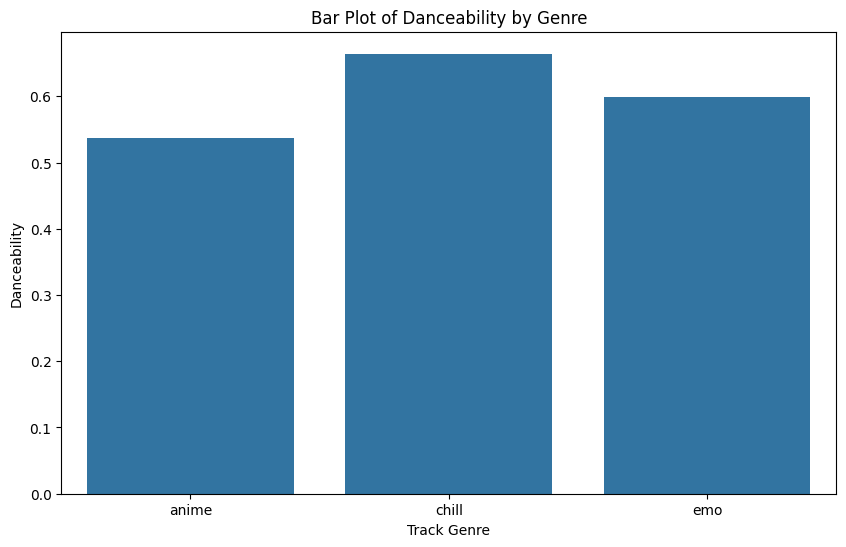

In [8]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["chill", "grunge", "anime", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='danceability', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Danceability')
plt.title('Bar Plot of Danceability by Genre')

# Show the plot
plt.show()


Pada plot ini kita menggunakan empat genre yang memiliki  tingkat popularitas yang tinggi yang dapat kita lihat pada plot sebelumnya, genre chill memiliki nilai danceability tertinggi, diikuti oleh emo. Genre anime juga relatif cocok untuk berdansa, sedangkan genre grunge memiliki nilai danceability terendah. Pada empat top genre yang populer ini nilai danceability berkisar antara >0.4 hingga <0.7, dengan ini kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai danceability harus ada pada kisaran angka tersebut.

<ipython-input-9-22b74df14c6f>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='energy', data=filtered_data, ci=None)


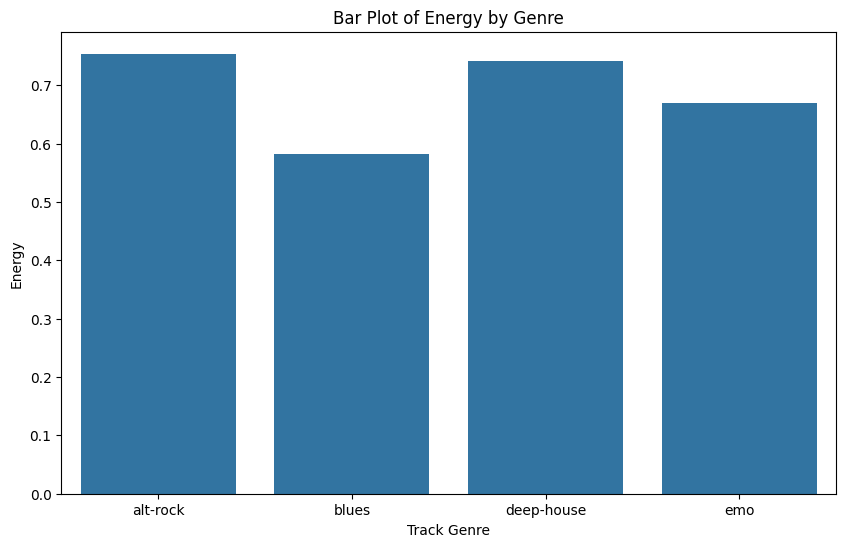

In [9]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["alt-rock", "blues", "deep-house", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='energy', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Energy')
plt.title('Bar Plot of Energy by Genre')

# Show the plot
plt.show()

Pada plot ini, genre yang memiliki tingkat kepopularitasan yang tinggi memiliki nilai energy yang berkisar antara >0.5 hingga <0.8. Dengan alt-rock yang memiliki tingkat energy yang tinggi diikuti dengan deep-house dan emo, sedangkan blues memiliki tingkat energy yang lebih rendah. Dengan ini dapat kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai energy harus ada pada kisaran angka tersebut.

<ipython-input-10-7df87278b7f1>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='valence', data=filtered_data, ci=None)


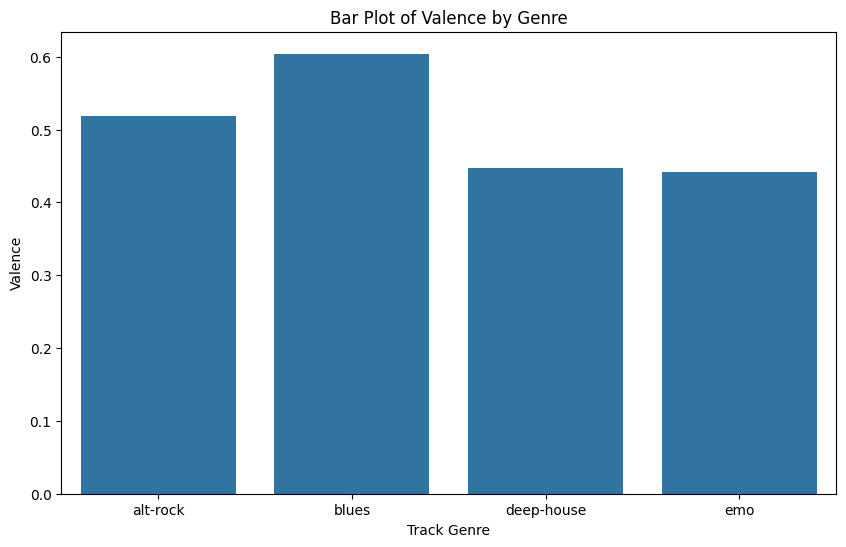

In [10]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["alt-rock", "blues", "deep-house", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='valence', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Valence')
plt.title('Bar Plot of Valence by Genre')

# Show the plot
plt.show()

Pada plot ini dapat kita lihat bahwa genre yang memiliki tingkat popularitas yang tinggi memiliki nilai valence yang berkisar antara >0.4 hingga 0.6. Dapat diasumsikan bahwa untuk mencipatakan lagu yang populer nilai kepositifan sebuah lagu sebaiknya tidak terlalu positif dalam konteks cheerful dan juga tidak terlalu negatif dalam konteks sedih. Dengan blues yang memiliki nilai valence tertinggi diikuti dengan alt-rock, deep-house, dan emo. Dengan ini dapat kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai valence harus ada pada kisaran angka tersebut.

### Verify Data Quality

#### Missing Values

In [11]:
missing_values = df_file.isnull().sum()

print(missing_values)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      1
track_genre         1
dtype: int64


Dapat kita lihat di atas bahwa pada kolom artists, album_name, dan track_name terdapat satu missing values. Dan untuk kolom sisanya seperti track_id, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, dan track_genre tidak memiliki missing values pada kolomnya.

#### Outliers Value

In [12]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
popularity,0.002393
duration_ms,5.245148
danceability,0.411572
energy,0.000000
key,0.000000
loudness,5.840971
mode,0.000000
speechiness,12.797014
acousticness,0.000000


Setiap kolom yang ada pada hasil di atas memiliki jumlah outliers sebanyak 0 dan masing-masing juga memiliki persentase kehadiran outliers sebesar 0.00%

#### Duplicated Values

In [13]:
duplicate_values =(df_file.duplicated())

print("Apakah Ada Nilai Duplikat pada Tiap Kolom:")
print(duplicate_values)

Apakah Ada Nilai Duplikat pada Tiap Kolom:
0        False
1        False
2        False
3        False
4        False
         ...  
41786    False
41787    False
41788    False
41789    False
41790    False
Length: 41791, dtype: bool


Untuk hasil dari cek duplikasi dataset yang ada di atas dapat disimpulkan bahwa banyak data yang tidak ada data yang duplikat sehingga tidak berpengaruh terhadap statistik deskriptif yang berarti bisa menjadi bias dan tidak mencerminkan variasi sebenarnya didalam dataset.

##**Data Cleaning**

### Penanganan Missing Values

#### Pengecekan Missing Values

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [62]:
print((df_file.isna().sum() / len(df_file)) * 100)

Unnamed: 0          0.000000
popularity          0.000000
duration_ms         0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
time_signature      0.002934
tempo_type          0.000000
popularity_type     0.000000
dtype: float64


Nilai kosong pada kolom artists

In [15]:
df_file[df_file['artists'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Nilai kosong pada kolom album_name

In [16]:
df_file[df_file['album_name'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Nilai kosong pada track_name

In [17]:
df_file[df_file['track_name'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


#### Hapus Missing Values

In [63]:
df_file = df_file[df_file["track_id"] != "1kR4gIb7nGxHPI3D2ifs59"]

KeyError: 'track_id'

#### Imputasi Missing Values

In [64]:
df_file['popularity_type'] = df_file['popularity_type'].fillna(df_file['popularity_type'].mode()[0])

Pada dataset ini imputasi tidak diperlukan sama sekali

#### Pengecekkan Ulang

In [65]:
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=['Null Ratio %'])

,Null Ratio %
Unnamed: 0,0.000000
popularity,0.000000
duration_ms,0.000000
danceability,0.000000
energy,0.000000
key,0.000000
loudness,0.000000
mode,0.000000
speechiness,0.000000
acousticness,0.000000


Setelah dilakukan penghapusan pada missing values, setelah di cek kembali missing values pada semua kolom menjadi tidak ada

### Penanganan Duplicated Values

#### Pengecekkan Nilai Duplikat

In [32]:
df_file[df_file.duplicated()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tempo_type,popularity_type


Pada data set ini tidak ada nilai yang memiliki duplikat pada semua kolomnya

#### Hapus Nilai Duplikat

Tidak ada yang perlu dihapus karna nilai duplikat tidak ada pada data set ini

### Penanganan Outliers

#### Pengecekkan Outliers

In [66]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
popularity,0.000000
duration_ms,2.552892
danceability,0.305173
energy,0.002934
key,0.000000
loudness,1.828105
mode,0.000000
speechiness,12.133572
acousticness,0.000000


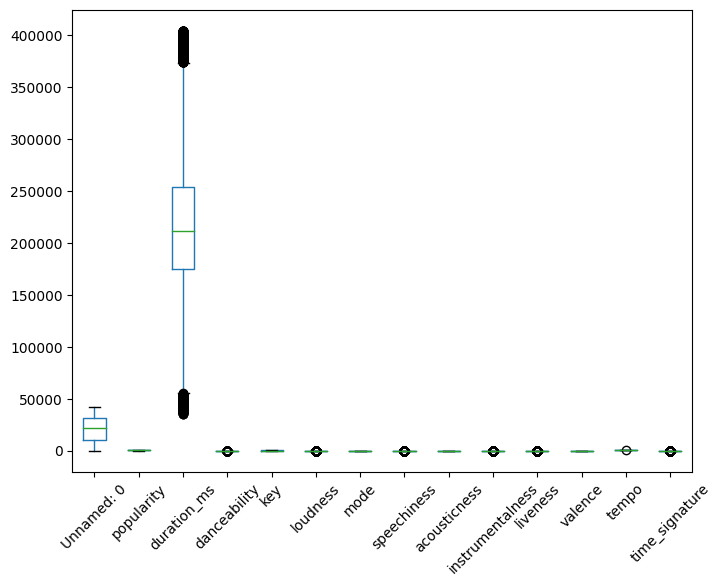

In [67]:
boxplot = df_file.drop('energy', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#### Hapus Outliers

Melakukan penghapusan baris pada kolom popularity untuk menangani outliers

In [68]:
Q1 = df_file['popularity'].quantile(0.25)
Q3 = df_file['popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['popularity'] >= lower_bound) & (df_file['popularity'] <= upper_bound)]

Melakukan penghapusan baris pada kolom duration_ms untuk menanganin outliers

In [69]:
Q1 = df_file['duration_ms'].quantile(0.25)
Q3 = df_file['duration_ms'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['duration_ms'] >= lower_bound) & (df_file['duration_ms'] <= upper_bound)]

Melakukan penghapusan baris pada kolom danceability untuk menanganin outliers

In [70]:
Q1 = df_file['danceability'].quantile(0.25)
Q3 = df_file['danceability'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['danceability'] >= lower_bound) & (df_file['danceability'] <= upper_bound)]

Melakukan penghapusan baris pada kolom loudness untuk menanganin outliers

In [71]:
Q1 = df_file['loudness'].quantile(0.25)
Q3 = df_file['loudness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['loudness'] >= lower_bound) & (df_file['loudness'] <= upper_bound)]

Melakukan penghapusan baris pada kolom liveness untuk menanganin outliers

In [72]:
Q1 = df_file['liveness'].quantile(0.25)
Q3 = df_file['liveness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['liveness'] >= lower_bound) & (df_file['liveness'] <= upper_bound)]

Melakukan penghapusan baris pada kolom tempo untuk menanganin outliers

In [73]:
Q1 = df_file['tempo'].quantile(0.25)
Q3 = df_file['tempo'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_file = df_file[(df_file['tempo'] >= lower_bound) & (df_file['tempo'] <= upper_bound)]

#### Pengecekkan Ulang

In [74]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.000000
popularity,0.000000
duration_ms,0.924958
danceability,0.038012
energy,0.015838
key,0.000000
loudness,0.490988
mode,0.000000
speechiness,12.103646
acousticness,0.000000


Dapat dilihat persentase outliers pada setiap kolom yang memiliki nilai dibawah 10 semuanya sudah ditangani

### Construct Data

#### Melakukan Rekayasa Fitur (Feature Engineering)

In [46]:
min_tempo = df_file['tempo'].min()
max_tempo = df_file['tempo'].max()

# Menambahkan kolom "tempo_type" berdasarkan kriteria
df_file['tempo_type'] = pd.cut(df_file['tempo'], bins=[min_tempo - 1, 54, 116, float('inf')],
                          labels=['slow', 'moderate', 'fast'])

bins = [0, 50, 100]  # Menentukan batas-batas bins
labels = ['low', 'high']  # Memberi label pada bins

# Menggunakan pd.cut() untuk membuat bins
df_file['popularity_type'] = pd.cut(df_file['popularity'], bins=bins, labels=labels)

Pada rekayasa fitur di atas, kolom tempo_type ditambahkan untuk membagi jenis tempo menjadi tiga jenis yaitu, slow, moderate, dan fast. Dan pada kolom popularity_type ditambahkan untuk membagi jenis popularitas menjadi dua jenis yaitu, low dan high.

#### Pengecekkan Hasil

In [21]:
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tempo_type,popularity_type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,moderate,high
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,moderate,high
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,moderate,high
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,fast,high
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,fast,high


### Data Reduction

#### Mengurangi Fitur-Fitur Yang Kurang Relevan

Pada dataset yang saya miliki semua kolom yang ada sangat relevan untuk dipakai dalam data mining goals saya.

#### Pengecekkan Hasil

In [48]:
df_corr = df_file.corr(numeric_only=True)
px.imshow(df_corr)

### Data Transformation

#### Mapping

In [47]:
df_file['tempo_type'] = df_file['tempo_type'].map({'slow':1,'moderate':2,'fast':3})
df_file['popularity_type'] = df_file['popularity_type'].map({'low':1,'high':2})

In [49]:
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tempo_type,popularity_type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.0,acoustic,2,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.0,acoustic,2,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.0,acoustic,3,1
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4.0,acoustic,2,1
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3.0,acoustic,3,1


Pada mapping ini sayang mengubah values pada kolom "tempo_type" yang sebelumnya adalah slow, moderate, dan fast. Menjadi angka 1, 2, dan 3. Dan values pada kolom popularity_type menjadi 0 dan 1.

#### Pengecekkan Ulang

In [25]:
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,tempo_type,popularity_type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,2,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,2,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,2,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,3,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,3,1


In [51]:
# df_file = df_file.drop(["track_id","artists","album_name","track_name","explicit","track_genre"], axis=1)
df_file.info()
df_file.to_csv('DataCleanedNew.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34079 entries, 0 to 41790
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        34079 non-null  int64   
 1   popularity        34079 non-null  int64   
 2   duration_ms       34079 non-null  int64   
 3   danceability      34079 non-null  float64 
 4   energy            34079 non-null  float64 
 5   key               34079 non-null  int64   
 6   loudness          34079 non-null  float64 
 7   mode              34079 non-null  int64   
 8   speechiness       34079 non-null  float64 
 9   acousticness      34079 non-null  float64 
 10  instrumentalness  34079 non-null  float64 
 11  liveness          34079 non-null  float64 
 12  valence           34079 non-null  float64 
 13  tempo             34079 non-null  float64 
 14  time_signature    34078 non-null  float64 
 15  tempo_type        34079 non-null  category
 16  popularity_type   3407

### Library untuk Splitting Data

In [52]:
from sklearn.model_selection import train_test_split

### Library untuk Normalisasi Data

In [53]:
from sklearn.preprocessing import MinMaxScaler

### Library untuk Build Model

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

### Inisiasi

In [75]:
df = pd.read_csv("DataCleanedNew.csv")
df.head()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_type,popularity_type
0,0,73,230666,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,2,2
1,2,57,210826,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,2,2
2,4,82,198853,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,3,2
3,5,58,214240,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,2,2
4,6,74,229400,0.407,0.147,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,3,2


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94740 entries, 0 to 94739
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        94740 non-null  int64  
 1   popularity        94740 non-null  int64  
 2   duration_ms       94740 non-null  int64  
 3   danceability      94740 non-null  float64
 4   energy            94740 non-null  float64
 5   key               94740 non-null  int64  
 6   loudness          94740 non-null  float64
 7   mode              94740 non-null  int64  
 8   speechiness       94740 non-null  float64
 9   acousticness      94740 non-null  float64
 10  instrumentalness  94740 non-null  float64
 11  liveness          94740 non-null  float64
 12  valence           94740 non-null  float64
 13  tempo             94740 non-null  float64
 14  time_signature    94740 non-null  int64  
 15  tempo_type        94740 non-null  int64  
 16  popularity_type   94740 non-null  int64 

## **Modelling Predict**

Saya memilih model prediktif karena memungkinkan saya memanfaatkan informasi dari kolom-kolom yang ada pada dataset ini untuk menghasilkan prediksi yang akurat tentang popularitas sebuah lagu. Model prediktif juga dirancang untuk memprediksi nilai numerik dengan tingkat akurasi yang tinggi sehingga dengan mempelajari hubungan antara fitur-fitur lagu dan popularitasnya, model prediktif mampu menghasilkan prediksi yang akurat dan terpercaya.

### Pre-Processing

#### Split Data

In [77]:
x = df.drop('popularity_type', axis=1)
y = df['popularity_type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Pada bagian splitting data ini saya menggunakan rasio 8:2 karena jumlah baris pada dataset saya berjumlah lebih dari 1000 secara spesifik memiliki 114000 baris.

#### Normalisasi Data

In [78]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Sebelum menjalankan sintaks normalisasi data, kita perlu mempersiapkan dua kumpulan data yaitu, data pelatihan (x_train) dan data pengujian (x_test). Proses normalisasi kemudian menghasilkan dua kumpulan data baru yaitu, x_train_norm (data pelatihan yang telah dinormalisasi) dan x_test_norm (data pengujian yang telah dinormalisasi). Kedua kumpulan data ini siap digunakan untuk melatih dan menguji model machine learning.

### **Build and Train Model**

##### **Gaussian Naive Bayes**

In [79]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

GaussianNB() menginisialisasi objek model Naive Bayes Gaussian, yang kemudian dilatih dengan data pelatihan dan label pelatihan menggunakan gnb.fit(x_train_norm, y_train). Model ini mempelajari hubungan antara fitur dan label dalam data pelatihan, menggunakan distribusi normal untuk setiap fitur di setiap kelas. Selanjutnya, model menghitung probabilitas setiap contoh data berdasarkan labelnya.

##### **K-Nearest Neighbor**

In [80]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

KNeighborsClassifier() menginisialisasi objek model klasifikasi berbasis K-Nearest Neighbors (KNN). Dengan menggunakan knn.fit(x_train_norm, y_train), model ini dilatih dengan data pelatihan (x_train_norm) dan label pelatihan (y_train). Model ini bekerja dengan cara mempelajari pola dari data pelatihan dan menyimpannya untuk memprediksi label dari data uji berdasarkan tetangga terdekatnya dalam ruang fitur.

##### **Decision Tree**

In [81]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

DecisionTreeClassifier() menginisialisasi objek model klasifikasi berbasis Pohon Keputusan. Melalui dtc.fit(x_train_norm, y_train), model ini dilatih dengan data pelatihan (x_train_norm) dan label pelatihan (y_train). Pohon keputusan mempelajari pola dari data pelatihan dengan membuat serangkaian keputusan berbasis fitur untuk membagi data ke dalam kelas yang berbeda. Proses ini dilakukan dengan memilih fitur yang memberikan pemisahan yang paling baik pada setiap langkahnya.

### **Begins and Compare Predict**

In [82]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Pada baris pertama, gnb_pred menggunakan model GaussianNB yang telah dilatih sebelumnya (gnb) untuk melakukan prediksi terhadap data uji yang telah dinormalisasi (x_test_norm). Baris kedua, knn_pred menggunakan model KNeighborsClassifier yang telah dilatih sebelumnya (knn) untuk melakukan prediksi terhadap data uji yang telah dinormalisasi. Sedangkan pada baris ketiga, dtc_pred menggunakan model DecisionTreeClassifier yang telah dilatih sebelumnya (dtc) untuk melakukan prediksi terhadap data uji yang telah dinormalisasi.

In [83]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Pada blok kode ini, DataFrame x_test dan y_test diubah menjadi DataFrame baru dengan mengatur ulang indeks agar dimulai dari 0. Selanjutnya, hasil prediksi dari model GaussianNB, KNeighborsClassifier, dan DecisionTreeClassifier dikonversi menjadi DataFrame masing-masing, dengan menetapkan nama kolom sesuai dengan jenis prediksi yang dilakukan. Kemudian, keseluruhan data, termasuk data uji, label aktual (y_test), dan prediksi dari ketiga model, digabungkan menjadi satu DataFrame baru bernama combined_data dengan menggunakan fungsi pd.concat(), yang menggabungkan DataFrames secara berdampingan (axis=1).

In [84]:
combined_data.sample(100)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,tempo_type,popularity_type,gnb_prediction,knn_prediction,dtc_prediction
1690,1740,19,182773,0.748,0.626,4,-6.909,0,0.2120,0.013500,0.000047,0.0385,0.440,149.933,4,3,1,1,1,1
5772,1466,21,271189,0.413,0.744,3,-9.798,0,0.0694,0.240000,0.602000,0.1090,0.963,88.561,4,2,1,1,1,1
1746,66134,19,63053,0.915,0.525,9,-6.448,1,0.3730,0.563000,0.000000,0.1930,0.937,107.861,4,2,1,1,1,1
8122,48454,42,167812,0.651,0.900,7,-3.539,0,0.1020,0.014700,0.000000,0.0969,0.148,127.979,4,3,1,1,1,1
1110,27855,39,260179,0.409,0.991,5,-2.241,0,0.3340,0.000333,0.000090,0.0838,0.170,173.948,4,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,43666,40,307320,0.789,0.512,6,-9.942,0,0.0347,0.041700,0.375000,0.0992,0.444,115.007,4,2,1,1,1,1
9146,30079,0,164818,0.754,0.763,7,-4.627,0,0.0435,0.030100,0.000022,0.0901,0.464,117.953,4,3,1,1,1,1
13016,23757,56,142800,0.732,0.890,1,-7.021,0,0.0647,0.031200,0.000233,0.1620,0.217,124.989,4,3,2,2,2,2
11688,77682,43,178986,0.513,0.770,7,-6.416,1,0.0866,0.571000,0.000000,0.1170,0.824,88.101,4,2,1,1,1,1


## **Evaluation**

### Evaluate Result

#### Klasifikasi

Gausian Naive Bayes

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
gnb_cm = confusion_matrix(y_test, gnb_pred)

# gnb_cm
tn, fp, fn, tp = gnb_cm.ravel()
print('Gaussian Naive Bayes')
print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)

TN : 13642
FP : 405
FN : 423
TP : 4478


In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
knn_cm = confusion_matrix(y_test, knn_pred)

# knn_cm
tn, fp, fn, tp = knn_cm.ravel()
print('K-Nearest Neighbor')
print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)

K-Nearest Neighbor
TN : 13552
FP : 495
FN : 824
TP : 4077


In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dtc_cm = confusion_matrix(y_test, dtc_pred)

# dtc_cm
tn, fp, fn, tp = dtc_cm.ravel()
print('Decision Tree Classifier')
print('TN :', tn)
print('FP :', fp)
print('FN :', fn)
print('TP :', tp)

Decision Tree Classifier
TN : 14047
FP : 0
FN : 0
TP : 4901


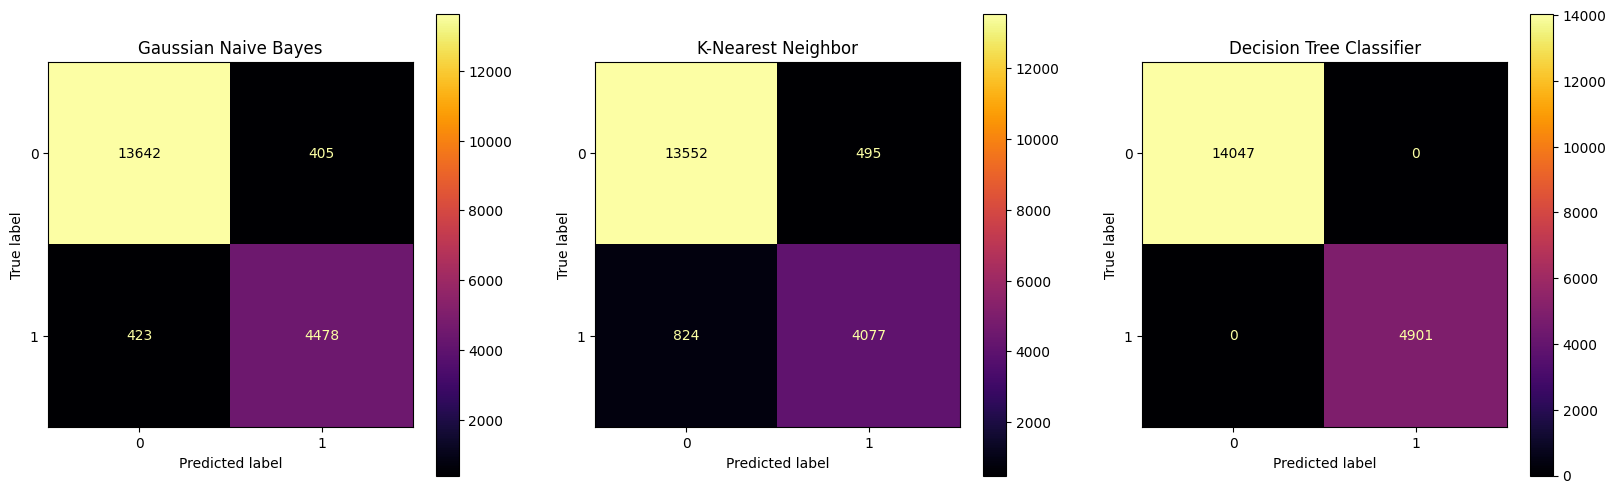

In [85]:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

  gnb_cm = confusion_matrix(y_test, gnb_pred)
  gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
  gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

  knn_cm = confusion_matrix(y_test, knn_pred)
  knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
  knn_cm_display.ax_.set_title("K-Nearest Neighbor")

  dtc_cm = confusion_matrix(y_test, dtc_pred)
  dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
  dtc_cm_display.ax_.set_title("Decision Tree Classifier")

  plt.show()

Dapat dilihat pada gambar confussion matrix diatas untuk rincian elemen-elemen kunci pada  setiap modelnya seperti berikut:
1. Gaussian Naive Bayes (GNB):
- True Positive (TP) = 13642
- False Positive (FP) = 405
- False Negative (FN) = 4478
- True Negative (TN) = 423
2. K-Nearest Neighbor (KNN):
- True Positive (TP) = 13552
- False Positive (FP) = 495
- False Negative (FN) = 4077
- True Negative (TN) = 824
3. Decision Tree Classifier (DTC):
- True Positive (TP) = 14047
- False Positive (FP) = 0
- False Negative (FN) = 4901
- True Negative (TN) = 0

Pada bagian True Positive (TP) model Decision Tree Classifier memiliki jumlah observasi positif yang benar sedikit lebih banyak dari model lain. Dan juga pada False Positive (FP) dan True Negative (TN) mode DTC memiliki jumlah sebesar 0 yang berarti model DTC tidak memprediksi positif palsu dan melewatkan kasus positif yang membuat model ini tidak memiliki kesalahan dalam klasifikasi positif dan negatif.

Untuk model Gaussian Naive Bayes pada bagian True Positive dan False Positive sedikit lebih unggul dari K-Nearest Neighbor, namun pada bagian False Negative dan True Negative model K-Nearest Neighbor yang sedikit lebih unggul.

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve

tn1, fp1, fn1, tp1 = gnb_cm.ravel()

accuracy1 = (tp1+tn1) / (tn1 + fp1 + fn1 + tp1)
precision1 = tp1 / (tp1 + fp1)
recall1 = tp1 / (tp1+fn1)
f1_score1 = (2 * precision1 * recall1) / (precision1 + recall1)
roc_score1 = roc_auc_score(y_test, gnb_pred)
print("nilai akurasi gnb : ", accuracy1)
print("nilai presisi gnb : ", precision1)
print("nilai recall gnb : ", recall1)
print("nilai f1-score gnb : ", f1_score1)
print("nilai roc gnb : ", roc_score1)


tn2, fp2, fn2, tp2 = knn_cm.ravel()

accuracy2 = (tp2+tn2) / (tn2 + fp2 + fn2 + tp2)
precision2 = tp2 / (tp2 + fp2)
recall2 = tp2 / (tp2+fn2)
f1_score2 = (2 * precision2 * recall2) / (precision2 + recall2)
roc_score2 = roc_auc_score(y_test, knn_pred)
print("nilai akurasi knn : ", accuracy2)
print("nilai presisi knn : ", precision2)
print("nilai recall knn : ", recall2)
print("nilai f1-score knn : ", f1_score2)
print("nilai roc knn : ", roc_score2)

tn3, fp3, fn3, tp3 = dtc_cm.ravel()

accuracy3 = (tp3+tn3) / (tn3 + fp3 + fn3 + tp3)
precision3 = tp3 / (tp3 + fp3)
recall3 = tp3 / (tp3+fn3)
f1_score3 = (2 * precision3 * recall3) / (precision3 + recall3)
roc_score3 = roc_auc_score(y_test, dtc_pred)
print("nilai akurasi dtc : ", accuracy3)
print("nilai presisi dtc : ", precision3)
print("nilai recall dtc : ", recall3)
print("nilai f1-score dtc : ", f1_score3)
print("nilai roc dtc : ", roc_score3)

nilai akurasi gnb :  0.9563014566181127
nilai presisi gnb :  0.9170591849272988
nilai recall gnb :  0.9136910834523566
nilai f1-score gnb :  0.9153720359771054
nilai roc gnb :  0.942429652212403
nilai akurasi knn :  0.9303884314967279
nilai presisi knn :  0.8917322834645669
nilai recall knn :  0.8318710467251581
nilai f1-score knn :  0.8607621661564445
nilai roc knn :  0.8983161028457426
nilai akurasi dtc :  1.0
nilai presisi dtc :  1.0
nilai recall dtc :  1.0
nilai f1-score dtc :  1.0
nilai roc dtc :  1.0


Dari hasil nilai Akurasi, Presisi, Recall, F1-Score, dan ROC dari tiga model yang digunakan dapat diambil kesimpulan bahwa model Decision Tree Classifier memiliki nilai sempurna pada setiap penilaian namun ada kemungkinan besar terjadinya overfitting pada model ini, disusul dengan model Gaussian Naive Bayes dan yang terakhir adalah model K-Nearest Neighbor. Pada nilai ROC AUC pada semua model menunjukkan nilai yang tinggi yang berarti semua model memiliki kemampuan yang baik untuk membedakan antara positif dan negatif.

Model GNB memiliki FP dan FN yang rendah, menunjukkan kesalahan klasifikasi yang minimal. Dan GNB juga memiliki ROC AUC yang tinggi, menunjukkan kemampuan yang baik untuk membedakan antara positif dan negatif.

Model KNN memiliki FP yang lebih tinggi daripada GNB, menunjukkan kecenderungan untuk overfitting kelas positif.Dan juga memiliki FN yang lebih rendah daripada GNB, menunjukkan kemampuan yang lebih baik dalam mendeteksi semua data positif.


Untuk klasifikasi umum, model GNB dapat menjadi pilihan yang baik, untuk DTC dapat dilakukan cross validation terlebih dahulu.

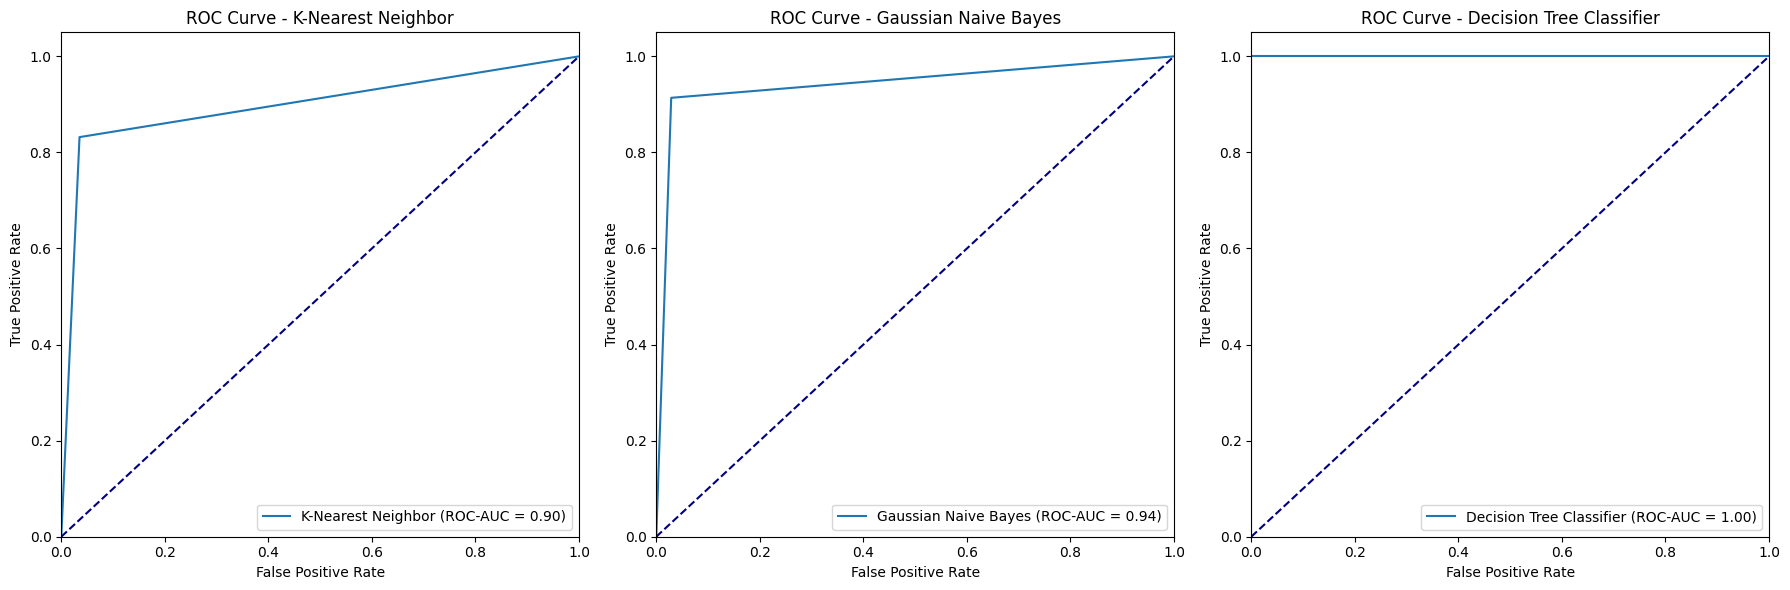

In [87]:

from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred = model.predict(x_test_norm)

    # Mengonversi label menjadi biner tanpa mengubah nilai 1 dan 2
    y_test_binary = (y_test == 2).astype(int)

    fpr, tpr, _ = roc_curve(y_test_binary, y_pred)

    roc_auc = roc_auc_score(y_test_binary, y_pred)

    ax.plot(fpr, tpr, label=f'{name} (ROC-AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()


Dalam kasus ini kurva KNN berada relatif dekat dengan sudut kiri atas dan memiliki AUC yang moderat, sekitar 0,8 atau lebih tinggi, hal ini menunjukkan kinerja yang baik dalam membedakan kelas. Sementara untuk GNB, kurvanya lebih halus dan berada lebih dekat ke sudut kiri atas daripada KNN, dengan AUC yang lebih tinggi mendekati 1, ini menunjukkan kinerja yang berpotensi lebih baik.

Untuk kurva DTC hampir tumpang tindih dengan sudut kiri atas dan memiliki AUC yang sangat tinggi (dekat dengan 1), ini menunjukkan kinerja luar biasa dalam membedakan kelas.

### Review Process

#### Cross Validation

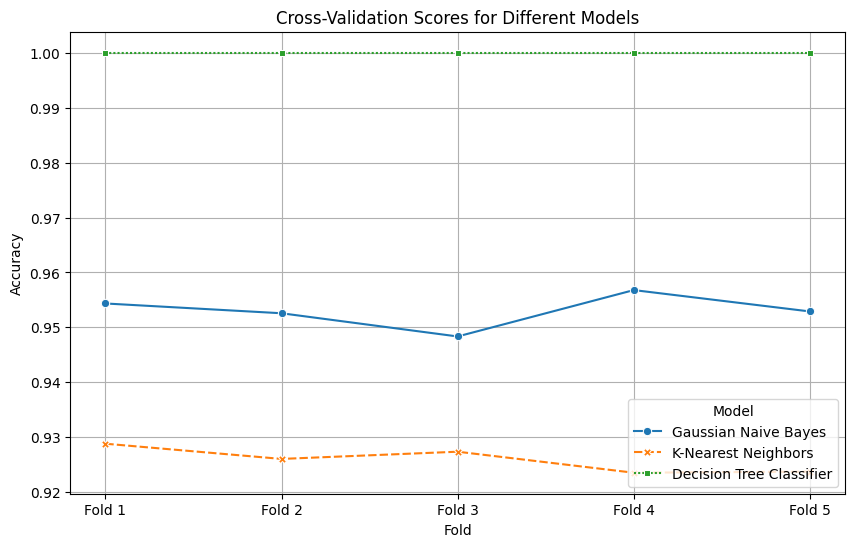

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model K-Nearest Neighbors
knn = KNeighborsClassifier()

# Lakukan validasi silang dengan k=5
cv_scores = cross_val_score(knn, x_train_norm, y_train, cv=5)

# Cetak skor validasi silang
print("Cross Validation Scores:", cv_scores)

# Cetak rata-rata skor validasi silang
print("Mean CV Score:", cv_scores.mean())


Cross Validation Scores: [0.92882116 0.92605053 0.92736509 0.92353873 0.92373664]
Mean CV Score: 0.9259024294538412


Pada gambar di atas dapat kita lihat akurasi dari tiga model yang ada mulai dari GNB, KNN, dan DTC. Untuk GNB nilai mulai dari fold 1 hingga fold 5 tidak memiliki perbedaan yang signifikan, dan juga pada rata-rata fold nya memiliki nilai yang lebih tinggi dari KNN. Untuk DTC setelah dilakukan cross-validation ditemukan nilai rata-rata nya adalah 0.925 yang berarti tidak jauh berbeda dengan nilai dari model KNN. Dapat disimpulkan disini bahwa model GNB memiliki nilai akurasi yang lebih tinggi dari KNN dan DTC.

#### Feature Selection

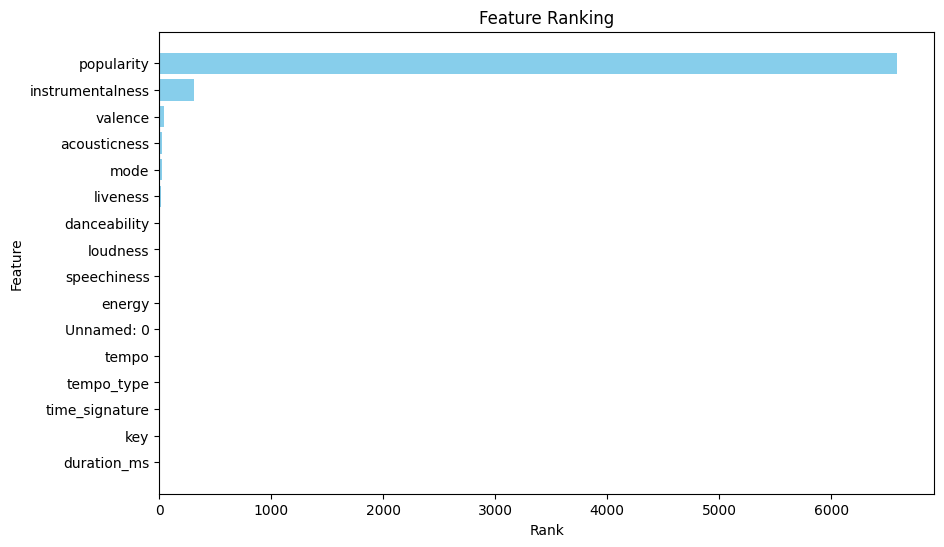

In [90]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Pada feature ranking di atas dapat kita lihat bahwa popularity menduduki peringkat tertinggi yang berarti menunjukkan hubungan yang kuat dengan variabel target juga dikarenakan variabel target yang digunakan itu berdasarkan dari fitur popularity itu sendiri.

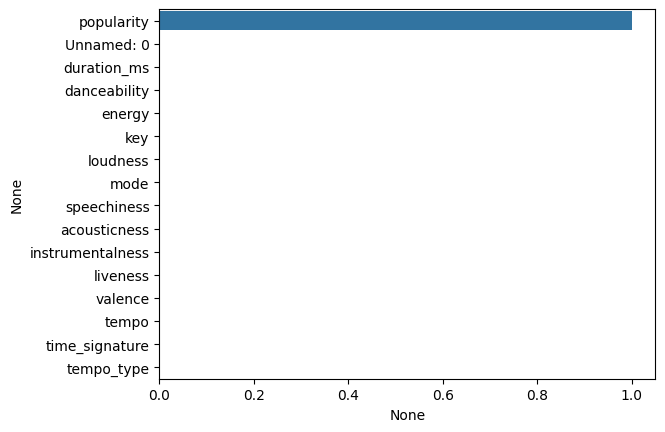

In [91]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

#### Tuning Hyperparameter

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.15199110829529336}
Akurasi sebelum tuning: 0.9563014566181127
Akurasi setelah tuning: 0.9541904158750264


Setelah di tuning nilai akurasi dari model GNB tidak berubah signifikan.

### Determine Next Step

Setelah melakukan evaluasi, dapat disimpulkan bahwa model klasifikasi menggunakan algoritma Gaussian Naive Bayes adalah algoritma yang optimal, karena beberapa hal berikut :

Akurasi = 0.9563014566181127

Presisi = 0.9170591849272988

Recall = 0.9136910834523566

F1 Score = 0.9153720359771054

ROC = 0.942429652212403
  
Matriks - matriks tersebut menunjukkan angka yang stabil dan analisis dapat dilanjutkan karena sudah mendapat algoritma yang optimal dari model klasifikasi, yaitu algoritma Gaussian Naive Bayes yang secara keseluruhan lebih unggul dari dua model lainnya.